In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import mpld3
mpld3.enable_notebook()

In [3]:
dataFile = 'AllParticipants.txt'

In [4]:
# Load the data into an Numpy array.
rawData = None
rawData = np.loadtxt(dataFile)
print(rawData.shape)

(31452, 10)


In [42]:
#Filter trials with more than 1sec latency and Intruction Button presses with more than 300ms latency
data = rawData
for i in range(len(rawData)-1,-1,-1):
  if data[i,0] > 300 or data[i,1] > 1000:
    data = np.delete(data, i, axis=0)

In [45]:
print(data.shape)

(29683, 10)


In [86]:
# Compute the range and means of latencies
latMin = np.min(data[:, 0])
latMax = np.max(data[:, 1])
#add means
print(np.mean(data[:,0], axis =0)) #Mean of Button release lat.
print(np.std(data[:,0], axis =0)) #Standard dev. of Button release lat.
print(np.mean(data[:,1])) #Mean of Trial lat.
print(np.std(data[:,1])) #Standard dev. of Trial lat.

135.91675369740256
42.64766752601329
543.748913519523
130.95252451917702


Text(0, 0.5, 'n Trials')

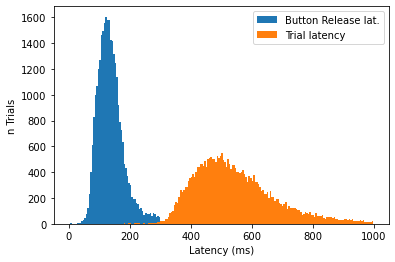

In [47]:
# Plot an histogram of the latencies
_= plt.hist(data[:, 0], bins=np.linspace(0, latMax, 201),label = "Button Release lat.")
_= plt.hist(data[:, 1], bins=np.linspace(0, latMax, 201), label = "Trial latency")
plt.legend()
plt.xlabel("Latency (ms)")
plt.ylabel("n Trials")

Text(0, 0.5, 'n Trials')

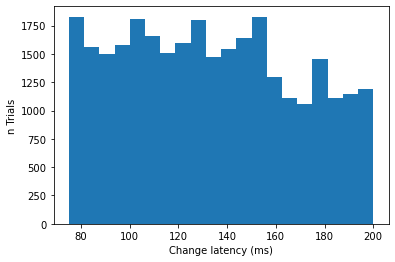

In [80]:
# Plot an histogram of the delay between the change of goal
_ = plt.hist(data[:, 4], bins=np.linspace(np.min(data[:, 4]), np.max(data[:, 4]), 21))

plt.xlabel("Change latency (ms)")
plt.ylabel("n Trials")

In [94]:
# Compute the number of successes versus fails
nTot = np.shape(data)[0]
nSuccess = int(np.sum(data[:, 9]))
nFails = int(nTot - nSuccess)
print("Total number of trials: " + str(nTot) + " (" + str(nSuccess) + " successes, " + str(nFails) + " fails)")

pSuccess= (nSuccess*100)/nTot
print("% of success: " + str(pSuccess))

Total number of trials: 29683 (18288 successes, 11395 fails)
% of success: 61.61102314456086


In [50]:
# Select rows corresponding to successes, failures and instruction changes
idxGood = np.where(data[:, 9] == 1)[0]
idxBad = np.where(data[:, 9] == 0)[0]
idxChanged = np.where(data[:, 3] == 1)[0]
idxNotChanged = np.where(data[:, 3] == 0)[0]
print("Target not changed, bad: " + str(len(np.intersect1d(idxNotChanged, idxBad))))
print("Target not changed, good: " + str(len(np.intersect1d(idxNotChanged, idxGood))))
print("Target changed, bad: " + str(len(np.intersect1d(idxChanged, idxBad))))
print("Target changed, good: " + str(len(np.intersect1d(idxChanged, idxGood))))

#

Target not changed, bad: 2601
Target not changed, good: 12442
Target changed, bad: 8794
Target changed, good: 5846


Text(0, 0.5, 'n Trials')

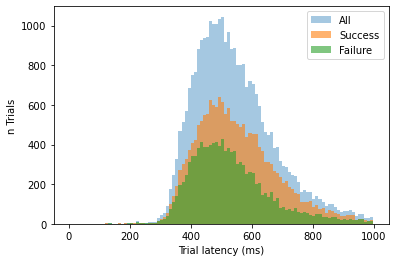

In [79]:
# Print info concerning the fails and successes 
_= plt.hist(data[:, 1], bins=np.linspace(0, latMax, 101), alpha = 0.4, label="All")
_= plt.hist(data[idxGood, 1], bins=np.linspace(0, latMax, 101), alpha = 0.6, label="Success")
_= plt.hist(data[idxBad, 1], bins=np.linspace(0, latMax, 101), alpha = 0.6, label="Failure")

plt.legend()
plt.xlabel("Trial latency (ms)")
plt.ylabel("n Trials")

535.6454400727769
123.71152189948849
599.4529592884023
135.35761642765092
% of success: 39.931693989071036


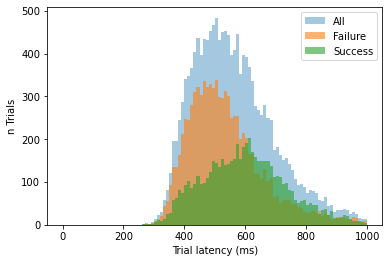

In [95]:
# Print info concerning the fails and successes exculisively during instruction changes
_= plt.hist(data[idxChanged, 1], bins=np.linspace(0, latMax, 101), alpha = 0.4, label="All")
_= plt.hist(data[np.intersect1d(idxChanged, idxBad), 1], bins=np.linspace(0, latMax, 101), alpha = 0.6, label="Failure")
_= plt.hist(data[np.intersect1d(idxChanged, idxGood), 1], bins=np.linspace(0, latMax, 101), alpha = 0.6, label="Success")

plt.legend()
plt.xlabel("Trial latency (ms)")
plt.ylabel("n Trials")

print(np.mean(data[np.intersect1d(idxChanged, idxBad), 1], axis =0)) #Mean of Button release lat.
print(np.std(data[np.intersect1d(idxChanged, idxBad), 1], axis =0)) #Standard dev. of Button release lat.
print(np.mean(data[np.intersect1d(idxChanged, idxGood), 1])) #Mean of Trial lat.
print(np.std(data[np.intersect1d(idxChanged, idxGood), 1])) #Standard dev. of Trial lat.

#Percentage of success for trials where a change occured
pChange= (len(np.intersect1d(idxChanged, idxGood))*100)/len(idxChanged)
print("% of success: " + str(pChange))

Text(0, 0.5, 'n Trials')

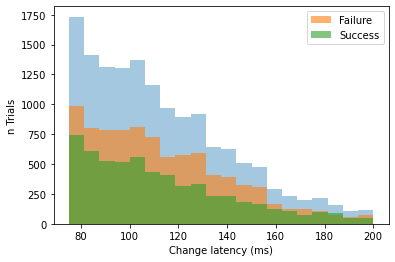

In [77]:
# Plot an histogram of the delay between the change of goal
_ = plt.hist(data[idxChanged, 4], bins=np.linspace(np.min(data[:, 4]), np.max(data[:, 4]), 21), alpha=0.4)
_ = plt.hist(data[np.intersect1d(idxChanged, idxBad), 4], bins=np.linspace(np.min(data[:, 4]), np.max(data[:, 4]), 21), alpha = 0.6, label="Failure")
_ = plt.hist(data[np.intersect1d(idxChanged, idxGood), 4], bins=np.linspace(np.min(data[:, 4]), np.max(data[:, 4]), 21), alpha = 0.6, label="Success")

plt.legend()
plt.xlabel("Change latency (ms)")
plt.ylabel("n Trials")

Text(0, 0.5, 'n Trials')

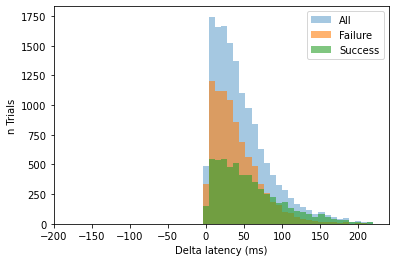

In [81]:
# Plot an histogram of successes
deltaLat = data[:, 0] - data[:, 4]
nBins = 51
ch = plt.hist(deltaLat[idxChanged], bins=np.linspace(np.min(deltaLat), np.max(deltaLat), nBins), alpha = 0.4, label="All")
bch = plt.hist(deltaLat[np.intersect1d(idxChanged, idxBad)], bins=np.linspace(np.min(deltaLat), np.max(deltaLat), nBins), alpha = 0.6, label="Failure")
gch = plt.hist(deltaLat[np.intersect1d(idxChanged, idxGood)], bins=np.linspace(np.min(deltaLat), np.max(deltaLat), nBins), alpha = 0.6, label="Success")

plt.legend()
plt.xlabel("Delta latency (ms)")
plt.ylabel("n Trials")

<ipython-input-54-b3571b32320e>:1: RuntimeWarning: invalid value encountered in true_divide
  ratio_good = gch[0] / ch[0]
<ipython-input-54-b3571b32320e>:2: RuntimeWarning: invalid value encountered in true_divide
  ratio_bad = bch[0] / ch[0]


Text(0, 0.5, 'P of success/failure')

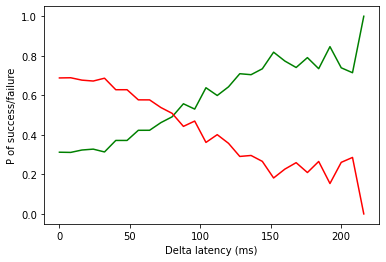

In [54]:
ratio_good = gch[0] / ch[0]
ratio_bad = bch[0] / ch[0]
plt.plot(0.5 * ch[1][1:] + 0.5 * ch[1][:-1], ratio_good, 'g', label = "Success")
plt.plot(0.5 * ch[1][1:] + 0.5 * ch[1][:-1], ratio_bad, 'r', label = "Failure")

plt.xlabel("Delta latency (ms)")
plt.ylabel("P of success/failure")

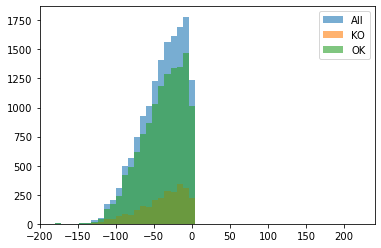

In [55]:
# Plot an histogram of the delay between the change of goal
deltaLat = data[:, 0] - data[:, 4]
ch_notChanged = plt.hist(deltaLat[idxNotChanged], bins=np.linspace(np.min(deltaLat), np.max(deltaLat), nBins), alpha = 0.6, label="All")
gch_notChanged = plt.hist(deltaLat[np.intersect1d(idxNotChanged, idxGood)], bins=np.linspace(np.min(deltaLat), np.max(deltaLat), nBins), alpha = 0.6, label="OK")
bch_notChanged = plt.hist(deltaLat[np.intersect1d(idxNotChanged, idxBad)], bins=np.linspace(np.min(deltaLat), np.max(deltaLat), nBins), alpha = 0.6, label="KO")
plt.legend()

<ipython-input-56-6dea943bb007>:1: RuntimeWarning: invalid value encountered in true_divide
  ratio_good_notChanged = gch_notChanged[0] / ch_notChanged[0]
<ipython-input-56-6dea943bb007>:2: RuntimeWarning: invalid value encountered in true_divide
  ratio_bad_notChanged = bch_notChanged[0] / ch_notChanged[0]


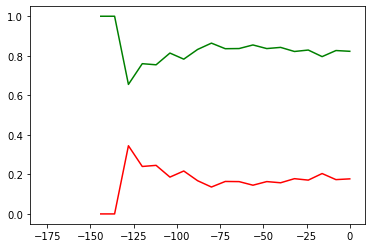

In [56]:
ratio_good_notChanged = gch_notChanged[0] / ch_notChanged[0]
ratio_bad_notChanged = bch_notChanged[0] / ch_notChanged[0]
plt.plot(0.5 * ch_notChanged[1][1:] + 0.5 * ch_notChanged[1][:-1], ratio_good_notChanged, 'g')
plt.plot(0.5 * ch_notChanged[1][1:] + 0.5 * ch_notChanged[1][:-1], ratio_bad_notChanged, 'r')